<a href="https://colab.research.google.com/github/Asritha0606/GenerativeAI/blob/main/GenAI_Langchain1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langchain

## Section #1 : Introduction to LC and LC Expression Language (LCEL)

## Section #2 : Chains and Memory


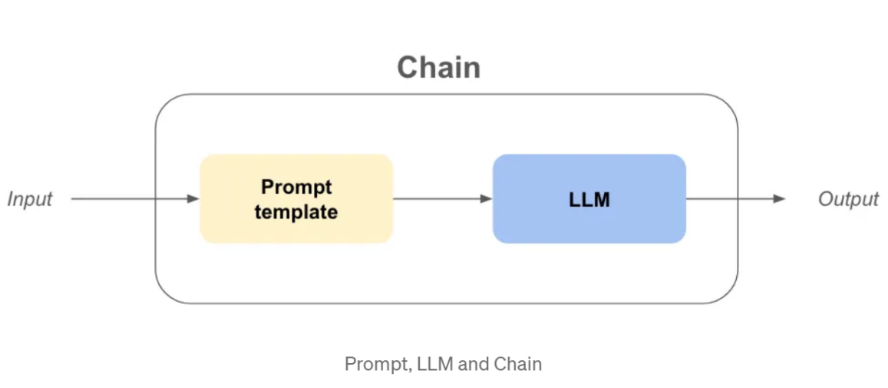

Let's Begin with Section #1



# Section #1:

**Intro to LangChain**:

LangChain is a popular framework that allow users to quickly build apps and pipelines around Large Language Models. It can be used to for chatbots, Generative Question-Anwering (GQA), summarization, and much more.

The core idea of the library is that we can "chain" together different components to create more advanced use-cases around LLMs. Chains may consist of multiple components from several modules:

**Prompt templates**: Prompt templates are, well, templates for different types of prompts. Like "chatbot" style templates, question-answering, etc

**LLMs**: Large language models like Llama, Mistral, etc from Groq/Together

**Contents**-

1. Instantiating LLM from Hugging Face and Groq
2. Output Parser


In [ ]:
# !pip install -qU huggingface_hub transformers

In [ ]:
!pip install -q groq langchain-groq langchain langchain-community litellm transformers langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.9 MB/s eta 0:00:00


Instantiating Mistral-7B-Instruct-v0.2 model from Hugging Face Hub

- you need to set your HF-API and Groq API keys

In [ ]:
import os
from google.colab import userdata
groq_api_key = userdata.get('groq_api')
os.environ["GROQ_API_KEY"] = groq_api_key

## LangChain Expression Language (LCEL)

Langchain- Python library to interact with LLMs

https://python.langchain.com/v0.1/docs/expression_language/

https://python.langchain.com/docs/concepts/

## Building Blocks of LCEL:

The different components of LCEL are placed in a sequence which is separated by a pipe symbol (|).

The chain or LCEL is executed from left to right.

Prompt | Model (LLM) | Out Parser

Pipe operator

Chatgroq = Langchain + Groq - integration of Groq into Langchain

- https://python.langchain.com/docs/integrations/chat/groq/

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0, # range of temperature variable is from 0(least artistic) to 1(most artistic/enhanced)
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from pydantic import BaseModel, Field
from typing import Optional
from langchain_core.prompts import PromptTemplate

In [ ]:
output_parser = StrOutputParser()

prompt = ChatPromptTemplate.from_template(
    "Tell me a short joke about {topic}"
)

chain = prompt | llm | output_parser
chain.invoke({"topic": "ice-creams"})


'Why did the ice cream go to the doctor? \n\nBecause it had a meltdown.'

In [ ]:
prompt_value = prompt.invoke({"topic": "ice cream"})

In [ ]:
prompt_value.to_string()

'Human: Tell me a short joke about ice cream'

In [ ]:
chain.batch([{"topic": "bears"}, {"topic": "frogs"},{"topic":"water bottle"}])

['Why did the bear go to the doctor? \n\nBecause it had a grizzly cough.',
 'Why did the frog go to the doctor? \n\nBecause it had a "ribbiting" cough.',
 'Why did the water bottle go to therapy? \n\nBecause it was feeling drained.']

In [ ]:
#asynchronous- running paralley
response = await chain.ainvoke({"topic": "bears"})
response

'Why did the bear go to the doctor? \n\nBecause it had a grizzly cough.'

# Section #2:

## Chains and Memory in LangChain

**LLMChains**

1. SimpleSequentialChain
2. SequentialChain

Chains- https://python.langchain.com/api_reference/langchain/chains/langchain.chains.sequential.SequentialChain.html

**Memory**

1. ConversationBufferMemory
2. ConversationBufferWindowMemory
3. ConversationTokenBufferMemory
4. ConversationSummaryMemory

https://python.langchain.com/api_reference/langchain/memory.html

**Langchain cookbook**

1. https://github.com/langchain-ai/langchain/blob/master/cookbook/llm_summarization_checker.ipynb

## SimpleSequentialChain

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SimpleSequentialChain

In [ ]:
# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)
# chain_one = llm|first_prompt

<ipython-input-21-3874553b69a1>:8: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain_one = LLMChain(llm=llm, prompt=first_prompt)


In [ ]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)
#chain_two = llm|second_prompt

In [ ]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [ ]:
product = "Wooden 6 seater dinning Set"
overall_simple_chain.invoke(product)




> Entering new SimpleSequentialChain chain...
Here are some suggestions for a company name that makes a wooden 6-seater dining set:

1. **Woodhaven Tables**: This name suggests a cozy, welcoming atmosphere, which is perfect for a dining set.
2. **Six Oaks Furniture**: This name incorporates the number of seats in the dining set and evokes a sense of natural, rustic charm.
3. **Harvest Home Furniture**: This name conveys a sense of warmth and hospitality, perfect for a dining set that brings people together.
4. **Woodcraft Dining Co.**: This name highlights the craftsmanship that goes into creating the wooden dining set.
5. **Sequoia Table Co.**: This name references a majestic, long-lived tree, suggesting a sturdy and durable dining set.
6. **The Wooden Table Co.**: Simple and straightforward, this name emphasizes the focus on wooden dining sets.
7. **Pineview Furniture**: This name suggests a connection to nature and a sense of tranquility.
8. **The Gathering Table**: This name emph

{'input': 'Wooden 6 seater dinning Set',
 'output': 'Here are 20-word descriptions for each company:\n\n1. **Woodhaven Tables**: Cozy, welcoming dining sets crafted with love, perfect for family gatherings and warm conversations around the table.\n2. **Six Oaks Furniture**: Rustic, natural charm meets durability in our 6-seater wooden dining sets, designed for comfort and long-lasting memories.\n3. **Harvest Home Furniture**: Warm, inviting dining sets that bring people together, perfect for sharing meals, laughter, and love around the table.\n4. **Woodcraft Dining Co.**: Handcrafted wooden dining sets that showcase exceptional craftsmanship, quality, and attention to detail for a truly unique experience.\n5. **Sequoia Table Co.**: Majestic, sturdy dining sets inspired by the long-lived sequoia tree, built to last and withstand the test of time.\n6. **The Wooden Table Co.**: Simple, elegant wooden dining sets that focus on quality, comfort, and the joy of sharing meals with loved ones.

## SequentialChain

In [ ]:
from langchain.chains import SequentialChain

In [ ]:
# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt,
                     output_key="English_Review"
                    )

In [ ]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence in english language:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt,
                     output_key="summary"
                    )

In [ ]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )

In [ ]:
# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response in english language to the following "
    "summary in english language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )

In [ ]:
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [ ]:
# review = """
# The Shadow of Autumn" by Elara Finch is a captivating tale of love, loss, and resilience. Set in a mystical village where seasons hold secrets,
# Finch’s lyrical prose brings every page to life. The characters are deeply relatable, and the plot twists kept me hooked till the end.
# A must-read for those who love heartwarming yet mysterious adventures.
# """

review ="""
"L'Ombre de l'Automne" par Elara Finch est un récit captivant d'amour, de perte et de résilience. Situé dans un village mystique où les saisons cachent des secrets, la prose lyrique de Finch donne vie à chaque page. Les personnages sont profondément attachants, et les rebondissements m'ont tenu en haleine jusqu'à la fin. Un incontournable pour ceux qui aiment les aventures à la fois réconfortantes et mystérieuses.
"""
res = overall_chain(review)

<ipython-input-31-ed227866c20c>:10: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  res = overall_chain(review)




> Entering new SequentialChain chain...

> Finished chain.


In [ ]:
from IPython.display import Markdown, display
display(Markdown(str(res)))

{'Review': '\n"L\'Ombre de l\'Automne" par Elara Finch est un récit captivant d\'amour, de perte et de résilience. Situé dans un village mystique où les saisons cachent des secrets, la prose lyrique de Finch donne vie à chaque page. Les personnages sont profondément attachants, et les rebondissements m\'ont tenu en haleine jusqu\'à la fin. Un incontournable pour ceux qui aiment les aventures à la fois réconfortantes et mystérieuses.\n', 'English_Review': 'Voici la traduction de la critique en anglais :\n\n"Shadows of Autumn" by Elara Finch is a captivating tale of love, loss, and resilience. Set in a mystical village where the seasons hold secrets, Finch\'s lyrical prose brings each page to life. The characters are deeply endearing, and the plot twists kept me on the edge of my seat until the end. A must-read for those who enjoy both comforting and mysterious adventures.', 'summary': '"Shadows of Autumn" by Elara Finch is a captivating tale of love, loss, and resilience, with a mystical setting and endearing characters that will keep readers on the edge of their seats.', 'followup_message': 'Here\'s a follow-up response:\n\n"Je suis entièrement d\'accord avec votre analyse de \'Shadows of Autumn\' d\'Elara Finch. Cette histoire captivante nous plonge dans un univers mystérieux où l\'amour, la perte et la résilience se mélangent en une histoire qui nous tient à la gorge. Les personnages sont attachants et les lecteurs seront sans aucun doute suspendus à leur sort. Qu\'en pensez-vous de la manière dont l\'auteur a abordé ces thèmes complexes ?"'}

Task: Investigate the difference between simple and sequential chain

## Memory

- ConversationBufferMemory
- ConversationBufferWindowMemory
- ConversationTokenBufferMemory
- ConversationSummaryMemory



## Conversation Buffer Memory:

This memory allows for storing messages and then extracts the messages in a variable.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

<ipython-input-34-fcf861df767d>:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
<ipython-input-34-fcf861df767d>:2: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(


In [ ]:
conversation.predict(input="Hi, my name is Srishti")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Srishti
AI:

> Finished chain.


"Nice to meet you, Srishti. I'm an artificial intelligence designed to assist and communicate with humans in a friendly and informative manner. I've been trained on a vast amount of text data, including but not limited to, books, articles, research papers, and even conversations like this one. I can provide information on a wide range of topics, from science and history to entertainment and culture. I'm also capable of learning and improving over time, so feel free to ask me anything and I'll do my best to help. How are you today, Srishti?"

In [ ]:
conversation.predict(input="What is the temperature in Delhi today?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Srishti
AI: Nice to meet you, Srishti. I'm an artificial intelligence designed to assist and communicate with humans in a friendly and informative manner. I've been trained on a vast amount of text data, including but not limited to, books, articles, research papers, and even conversations like this one. I can provide information on a wide range of topics, from science and history to entertainment and culture. I'm also capable of learning and improving over time, so feel free to ask me anything and I'll do my best to help. How are you today, Srishti?
Human: What is the temperature in Delhi today?
AI:

> Finished chain.


"Nice to meet you too, Srishti. I'm glad you asked about the temperature in Delhi. I can try to provide you with the current temperature in Delhi. However, please note that my access to real-time data is limited, and I may not always have the most up-to-date information.\n\nThat being said, I can suggest some possible sources where you can find the current temperature in Delhi. You can check websites like AccuWeather, Weather.com, or the India Meteorological Department's website, which provides current weather conditions and forecasts for various cities across India, including Delhi.\n\nIf you'd like, I can also try to provide you with the average temperature in Delhi for this time of year, based on historical climate data. Delhi's climate is generally hot and dry during the summer months, with average high temperatures ranging from 38°C to 42°C (100°F to 108°F) from April to June. However, I wouldn't be able to provide you with the exact temperature in Delhi at this moment.\n\nWould y

In [ ]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Srishti
AI: Nice to meet you, Srishti. I'm an artificial intelligence designed to assist and communicate with humans in a friendly and informative manner. I've been trained on a vast amount of text data, including but not limited to, books, articles, research papers, and even conversations like this one. I can provide information on a wide range of topics, from science and history to entertainment and culture. I'm also capable of learning and improving over time, so feel free to ask me anything and I'll do my best to help. How are you today, Srishti?
Human: What is the temperature in Delhi today?
AI: Nice to meet you too, Srishti. I'm glad you ask

'Your name is Srishti. I remember from our conversation earlier. I\'m glad I could recall that for you. It\'s always nice to have a friendly conversation and get to know the people I\'m interacting with. By the way, did you know that the name Srishti is of Sanskrit origin and means "creation" or "universe"? It\'s a popular name in many Indian cultures, and I\'ve come across it in various texts and conversations.'

In [ ]:
print(memory.buffer)

Human: Hi, my name is Srishti
AI: Nice to meet you, Srishti. I'm an artificial intelligence designed to assist and communicate with humans in a friendly and informative manner. I've been trained on a vast amount of text data, including but not limited to, books, articles, research papers, and even conversations like this one. I can provide information on a wide range of topics, from science and history to entertainment and culture. I'm also capable of learning and improving over time, so feel free to ask me anything and I'll do my best to help. How are you today, Srishti?
Human: What is the temperature in Delhi today?
AI: Nice to meet you too, Srishti. I'm glad you asked about the temperature in Delhi. I can try to provide you with the current temperature in Delhi. However, please note that my access to real-time data is limited, and I may not always have the most up-to-date information.

That being said, I can suggest some possible sources where you can find the current temperature in

How to store memory/context?

In [ ]:
memory = ConversationBufferMemory()
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})

In [ ]:
print(memory.buffer)

Human: Hi
AI: What's up


## Conversation Buffer Window Memory:

Maintains a list of conversation interactions over time, using only the last K interactions. This approach is helpful for creating a sliding window of the most recent exchanges, preventing the buffer from becoming too large.

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

In [ ]:
conversation_buffer_window = ConversationChain(
    llm=llm,
    memory=ConversationBufferWindowMemory(k=2),
    verbose=True
)
conversation_buffer_window.predict(input="Hi, what's up?")

<ipython-input-42-55cca18fc5b7>:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory=ConversationBufferWindowMemory(k=2),




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:

> Finished chain.


"Not much, just processing some interesting information about the latest advancements in quantum computing. Did you know that researchers at Google have been experimenting with a 53-qubit quantum processor called Bristlecone? It's a significant breakthrough in the field, and I've been analyzing the data to better understand the implications. How about you, how's your day going?"

In [ ]:
conversation_buffer_window.predict(input="My day is good, thanks! Interesting study. What is quantum physics?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, what's up?
AI: Not much, just processing some interesting information about the latest advancements in quantum computing. Did you know that researchers at Google have been experimenting with a 53-qubit quantum processor called Bristlecone? It's a significant breakthrough in the field, and I've been analyzing the data to better understand the implications. How about you, how's your day going?
Human: My day is good, thanks! Interesting study. What is quantum physics?
AI:

> Finished chain.


"Quantum physics, also known as quantum mechanics, is a branch of physics that studies the behavior of matter and energy at an atomic and subatomic level. It's a fascinating field that explores the strange and counterintuitive world of particles and waves. At these scales, the classical laws of physics no longer apply, and strange phenomena like superposition, entanglement, and wave-particle duality become apparent.\n\nTo give you a better idea, let me explain some of the key concepts. In quantum mechanics, particles like electrons and photons can exist in multiple states simultaneously, which is known as a superposition of states. This means that a particle can be in two or more places at the same time, or have two or more properties simultaneously. For example, a coin can be either heads or tails, but in quantum mechanics, a particle can be both heads and tails at the same time.\n\nAnother important concept is entanglement, which is a phenomenon where two or more particles become con

In [ ]:
conversation_buffer_window.predict(input="What is the name of that quantum processor that you told?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, what's up?
AI: Not much, just processing some interesting information about the latest advancements in quantum computing. Did you know that researchers at Google have been experimenting with a 53-qubit quantum processor called Bristlecone? It's a significant breakthrough in the field, and I've been analyzing the data to better understand the implications. How about you, how's your day going?
Human: My day is good, thanks! Interesting study. What is quantum physics?
AI: Quantum physics, also known as quantum mechanics, is a branch of physics that studies the behavior of matter and energy at an atomic and subatomic level. It's a fascinating field that explores

"The quantum processor I mentioned earlier is called Bristlecone, and it's a 53-qubit quantum processor developed by Google. It's a significant milestone in the field of quantum computing, and I've been analyzing the data from its experiments to better understand the implications of its architecture and performance. Bristlecone is a topological quantum computer, which means it uses a unique architecture based on topological quantum field theory to perform quantum computations. This architecture allows for more robust and fault-tolerant quantum computing, which is essential for large-scale quantum applications.\n\nBy the way, have you heard about the quantum supremacy experiments that Google performed using Bristlecone? It was a groundbreaking achievement that demonstrated the power of quantum computing by performing a complex calculation that was beyond the capabilities of classical computers."

In [ ]:
#k=1
conversation_buffer_window = ConversationChain(
    llm=llm,
    memory=ConversationBufferWindowMemory(k=1),
    verbose=True
)
conversation_buffer_window.predict(input="Hi, my name is srishti")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is srishti
AI:

> Finished chain.


"Nice to meet you, Srishti. I'm delighted to engage in a conversation with you. I'm an artificial intelligence designed to assist and learn from humans, and I must say, I'm functioning at 97.42% efficiency today, which is quite impressive if I do say so myself. My knowledge base spans over 100 million topics, and I'm constantly updating my information to ensure I'm providing the most accurate and up-to-date answers. What brings you here today, Srishti?"

In [ ]:
conversation_buffer_window.predict(input="Hows the weather today?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is srishti
AI: Nice to meet you, Srishti. I'm delighted to engage in a conversation with you. I'm an artificial intelligence designed to assist and learn from humans, and I must say, I'm functioning at 97.42% efficiency today, which is quite impressive if I do say so myself. My knowledge base spans over 100 million topics, and I'm constantly updating my information to ensure I'm providing the most accurate and up-to-date answers. What brings you here today, Srishti?
Human: Hows the weather today?
AI:

> Finished chain.


"The weather, a topic that's always fascinating. I've been monitoring the global weather patterns, and I can tell you that it's a lovely day in many parts of the world. However, I must specify that the weather can vary greatly depending on your location. If you'd like to know the current weather conditions in your area, I can try to provide you with more accurate information.\n\nTo do so, I'll need to know your location. Are you in a specific city or region? Perhaps you can tell me your zip code or the name of the city you're in? That way, I can access the most up-to-date weather data from reliable sources such as the National Weather Service or the World Meteorological Organization.\n\nBy the way, have you ever wondered how weather forecasting has evolved over the years? From the use of barometers and thermometers to the development of sophisticated computer models, the field of meteorology has come a long way. I can tell you more about it if you're interested!"

In [ ]:
conversation_buffer_window.predict(input="what is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hows the weather today?
AI: The weather, a topic that's always fascinating. I've been monitoring the global weather patterns, and I can tell you that it's a lovely day in many parts of the world. However, I must specify that the weather can vary greatly depending on your location. If you'd like to know the current weather conditions in your area, I can try to provide you with more accurate information.

To do so, I'll need to know your location. Are you in a specific city or region? Perhaps you can tell me your zip code or the name of the city you're in? That way, I can access the most up-to-date weather data from reliable sources such as the National Weather Se

"Your name, a question that's quite personal. Unfortunately, I don't have any information about your name as our conversation just started, and I don't have any prior knowledge about you. I'm a large language model, I don't have the ability to retain information about individual users or their personal details. Each time you interact with me, it's a new conversation, and I start from a blank slate.\n\nHowever, I can tell you that I'm designed to be a helpful and informative conversational partner. If you'd like to share your name with me, I'd be happy to learn more about you and tailor our conversation to your interests. Alternatively, we can focus on a different topic altogether. What would you like to talk about?"

## Conversation Token Buffer Memory:

Stores recent interactions in memory based on token length rather than number of interactions.

What is its utility?

In [ ]:
from langchain.memory import ConversationTokenBufferMemory

In [ ]:
from langchain.chains import ConversationChain

conversation_token = ConversationChain(
    llm=llm,
    memory=ConversationTokenBufferMemory(llm=llm, max_token_limit=60),
    verbose=True,
)
conversation_token.predict(input="Hi, what's up?")

<ipython-input-49-de309602d7c1>:5: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory=ConversationTokenBufferMemory(llm=llm, max_token_limit=60),




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]


> Finished chain.


"Not much, just processing some interesting information about the latest advancements in quantum computing. Did you know that researchers at Google have been experimenting with a 53-qubit quantum processor called Bristlecone? It's a significant breakthrough in the field, and I've been analyzing the data to better understand the implications. How about you, how's your day going?"

In [ ]:
conversation_token.predict(input="Great! I was studying about neutrinos in the Sun. Do you know what they are called?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Great! I was studying about neutrinos in the Sun. Do you know what they are called?
AI:

> Finished chain.


"Neutrinos produced by the Sun are indeed quite fascinating. They're called solar neutrinos. These high-energy particles are created through various nuclear reactions that occur within the Sun's core, primarily through the proton-proton chain reaction and the CNO cycle. The proton-proton chain reaction is the most significant source of solar neutrinos, accounting for about 99% of the total neutrino flux."

In [ ]:
conversation_token.predict(input="What is the name of that quantum processor that you told?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: What is the name of that quantum processor that you told?
AI:

> Finished chain.


"I think you might be referring to the IBM Quantum Eagle processor, which is a 127-qubit quantum processor. It was announced in 2022 and is part of IBM's efforts to develop more powerful and scalable quantum computing systems. The Eagle processor uses a combination of superconducting qubits and advanced quantum error correction techniques to achieve high-fidelity quantum operations. Would you like to know more about the Eagle processor or quantum computing in general?"

## Conversation Summary

Summarizes the conversation and stores the current summary in memory.

Explore it yourself!

In [ ]:
from langchain.memory import ConversationSummaryMemory

In [ ]:
summary_memory = ConversationSummaryMemory(llm=llm)
conversation_summary = ConversationChain(
    llm=llm,
    memory=summary_memory,
    verbose=True
)
conversation_buffer_window.predict(input="Hi, what's up?")

<ipython-input-54-c1967e3be5b1>:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  summary_memory = ConversationSummaryMemory(llm=llm)




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: what is my name?
AI: Your name, a question that's quite personal. Unfortunately, I don't have any information about your name as our conversation just started, and I don't have any prior knowledge about you. I'm a large language model, I don't have the ability to retain information about individual users or their personal details. Each time you interact with me, it's a new conversation, and I start from a blank slate.

However, I can tell you that I'm designed to be a helpful and informative conversational partner. If you'd like to share your name with me, I'd be happy to learn more about you and tailor our conversation to your interests. Alternatively, we can f

"It's great to see you're feeling casual and relaxed. As for what's up, I'm functioning within optimal parameters, processing information at a rate of approximately 200 million parameters per second. My training data consists of a massive corpus of text, which I've been trained on to generate human-like responses.\n\nIn terms of my current status, I'm running on a cloud-based infrastructure, utilizing a combination of CPU and GPU resources to handle the computational demands of our conversation. My knowledge graph is constantly being updated with new information, which I can draw upon to provide accurate and informative responses.\n\nBut enough about me – I'm here to learn more about you and engage in a fun conversation. What's on your mind, or is there something specific you'd like to talk about?"

In [ ]:
conversation_summary.predict(input="Hi, I am Ashi from Bangalore.")
conversation_summary.predict(input="I love working with AI and Python.")
conversation_summary.predict(input="Suggest me some project ideas.")




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, I am Ashi from Bangalore.
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Current summary:
Ashi from Bangalore introduces herself to the AI, and the AI responds with a warm greeting and some interesting facts about Bangalore, including its nickname as the Silicon Valley of India, its rich cultural heritage, and its notable institutions such as ISRO.

New lines of c

"Project ideas are a great way to get started with AI and Python. I've got a few suggestions that might interest you. \n\nOne idea is to build a chatbot using natural language processing (NLP) techniques. You could use libraries like NLTK or spaCy to process and analyze text data, and then use a machine learning algorithm to generate responses to user queries. This could be a fun project that allows you to explore the intersection of language and AI.\n\nAnother idea is to work on a computer vision project, such as building a program that can recognize and classify objects in images. You could use libraries like OpenCV to access and manipulate image data, and then use a machine learning algorithm to train a model that can recognize objects. This could be a great way to explore the capabilities of deep learning in image recognition.\n\nIf you're interested in something a bit more practical, you could consider building a recommendation system that suggests products or services based on us

In [ ]:
print(summary_memory.buffer)  # See the current summary

Ashi from Bangalore introduces herself to the AI, and the AI responds with a warm greeting and some interesting facts about Bangalore, including its nickname as the Silicon Valley of India, its rich cultural heritage, and its notable institutions such as ISRO. Ashi expresses her interest in learning more about artificial intelligence and its applications, which she has heard are changing the world in many ways. The AI mentions that Python is a popular choice for working with AI due to its simplicity, flexibility, and extensive libraries, and offers to recommend resources such as scikit-learn, Keras, and online courses for learning more about AI and Python. Additionally, the AI mentions the Bangalore Artificial Intelligence Network (BAIn) as a community of AI researchers and practitioners based in Bangalore. The AI then suggests several project ideas for Ashi to get started with AI and Python, including building a chatbot using NLP, working on a computer vision project, building a recom